In [74]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../code/')
import preprocess
import qc

import os

from subprocess import call

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%config Completer.use_jedi = False

### Small scale data
#### Merge multiplexed data into a simple count matrix

In [75]:
count_matrix_small = preprocess.create_count_matrix('../data/raw/190517_4x4_alignments/')
count_matrix_small = preprocess.remove_0_genes(count_matrix_small)

In [76]:
count_matrix_small.to_csv('../data/small_scale/small_scale_matrix.csv', sep=',')
count_matrix_small.head()

,DMSO_3_BIOReadsPerGene,Run_3_Bio_DMSO_YM115ReadsPerGene,Run_3_dT_Trametinib_YM115ReadsPerGene,Run_2_dT_Trametinib_DMSOReadsPerGene,Run_1_Bio_Trametinib_ImatinibReadsPerGene,DMSO_1_dTReadsPerGene,Run_1_dT_Imatinib_YM115ReadsPerGene,Run_1_dT_DMSO_YM115ReadsPerGene,Run_2_dT_Trametinib_YM115ReadsPerGene,Run_2_dT_YM115_ImatinibReadsPerGene,...,Run_1_Bio_Trametinib_YM115ReadsPerGene,Run_3_Bio_Imatinib_DMSOReadsPerGene,Run_1_dT_YM115_DMSOReadsPerGene,Run_1_Bio_Imatinib_DMSOReadsPerGene,Run_3_Bio_YM115_DMSOReadsPerGene,Run_1_Bio_Trametinib_DMSOReadsPerGene,Run_2_dT_DMSO_ImatinibReadsPerGene,Run_3_dT_Trametinib_DMSOReadsPerGene,Run_2_Bio_YM115_YM115ReadsPerGene,Run_3_dT_YM115_YM115ReadsPerGene
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000238009,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000233750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,21,0,0,0,0,0
ENSG00000268903,0,0,0,0,0,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000269981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000239906,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
count_matrix_small_HGNC = preprocess.translate_gene_ids(count_matrix_small.copy())
count_matrix_small_HGNC.to_csv('../data/small_scale/small_scale_matrix_HGNC.csv')
count_matrix_small_HGNC.head()

,DMSO_3_BIOReadsPerGene,Run_3_Bio_DMSO_YM115ReadsPerGene,Run_3_dT_Trametinib_YM115ReadsPerGene,Run_2_dT_Trametinib_DMSOReadsPerGene,Run_1_Bio_Trametinib_ImatinibReadsPerGene,DMSO_1_dTReadsPerGene,Run_1_dT_Imatinib_YM115ReadsPerGene,Run_1_dT_DMSO_YM115ReadsPerGene,Run_2_dT_Trametinib_YM115ReadsPerGene,Run_2_dT_YM115_ImatinibReadsPerGene,...,Run_1_Bio_Trametinib_YM115ReadsPerGene,Run_3_Bio_Imatinib_DMSOReadsPerGene,Run_1_dT_YM115_DMSOReadsPerGene,Run_1_Bio_Imatinib_DMSOReadsPerGene,Run_3_Bio_YM115_DMSOReadsPerGene,Run_1_Bio_Trametinib_DMSOReadsPerGene,Run_2_dT_DMSO_ImatinibReadsPerGene,Run_3_dT_Trametinib_DMSOReadsPerGene,Run_2_Bio_YM115_YM115ReadsPerGene,Run_3_dT_YM115_YM115ReadsPerGene
hgnc_symbol,,,,,,,,,,,,,,,,,,,,,
KMT2D,6,0,0,19,0,98,13,1,2,4,...,257,0,92,259,0,3,3,211,0,1
SLC25A3P2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PDE5A,0,0,3,0,0,0,0,0,0,0,...,0,0,15,0,0,0,0,0,0,0
ADCY6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DDOST,0,20,0,110,0,59,1,47,242,2,...,0,0,0,0,0,0,0,0,0,0


Creating metadata based on file names (Run, Barcode type from Braille valves, names of drugs). In **combos** drugs are ordered as *drug1_drug2*, while in **ordered**, drugs are ordered alphabetically.

In [78]:
meta_small = pd.DataFrame(index=count_matrix_small.columns, columns=['Run', 'dT', 'Drug1', 'Drug2'])
for sample in meta_small.index:
    if sample[:4] == 'DMSO':
        d, r, dT = sample.split('_')
        dT = dT[:-12]
        meta_small.loc[sample] = r, dT, d, d
    else:
        dummy, r, dT, d1, d2 = sample.split('_')
        d2 = d2[:-12]
        meta_small.loc[sample] = r, dT, d1, d2
meta_small['Combo'] = meta_small['Drug1'] + '_' + meta_small['Drug2']
meta_small['Ordered'] = ''
for sample in meta_small.index:
    d1, d2 = meta_small.loc[sample, ['Drug1', 'Drug2']]
    if d1 < d2:
        meta_small.loc[sample, 'Ordered'] = d1 + '_' + d2
    else:
        meta_small.loc[sample, 'Ordered'] = d2 + '_' + d1

In [79]:
meta_small

,Run,dT,Drug1,Drug2,Combo,Ordered
DMSO_3_BIOReadsPerGene,3,BIO,DMSO,DMSO,DMSO_DMSO,DMSO_DMSO
Run_3_Bio_DMSO_YM115ReadsPerGene,3,Bio,DMSO,YM115,DMSO_YM115,DMSO_YM115
Run_3_dT_Trametinib_YM115ReadsPerGene,3,dT,Trametinib,YM115,Trametinib_YM115,Trametinib_YM115
Run_2_dT_Trametinib_DMSOReadsPerGene,2,dT,Trametinib,DMSO,Trametinib_DMSO,DMSO_Trametinib
Run_1_Bio_Trametinib_ImatinibReadsPerGene,1,Bio,Trametinib,Imatinib,Trametinib_Imatinib,Imatinib_Trametinib
...,...,...,...,...,...,...
Run_1_Bio_Trametinib_DMSOReadsPerGene,1,Bio,Trametinib,DMSO,Trametinib_DMSO,DMSO_Trametinib
Run_2_dT_DMSO_ImatinibReadsPerGene,2,dT,DMSO,Imatinib,DMSO_Imatinib,DMSO_Imatinib
Run_3_dT_Trametinib_DMSOReadsPerGene,3,dT,Trametinib,DMSO,Trametinib_DMSO,DMSO_Trametinib
Run_2_Bio_YM115_YM115ReadsPerGene,2,Bio,YM115,YM115,YM115_YM115,YM115_YM115


In [80]:
drugs = list(set(meta_small['Drug1']) | set(meta_small['Drug2']))
combos = list(set(meta_small['Combo']))
ordered = ['o_' + x for x in list(set(meta_small['Ordered']))]

In [81]:
meta_small.to_csv('../data/small_scale/small_scale_meta.csv')

#### Splitting the two experiments
2 experiments were performed (switching barcodes between autosampler and braille valves), but they were sequenced together.

In [82]:
fil = meta_small['dT'] == 'dT'
meta_dt = meta_small[fil]
meta_bio = meta_small[~fil]

In [83]:
count_matrix_dt = count_matrix_small[meta_dt.index]
count_matrix_bio = count_matrix_small[meta_bio.index]
count_matrix_dt_HGNC = count_matrix_small_HGNC[meta_dt.index]
count_matrix_bio_HGNC = count_matrix_small_HGNC[meta_bio.index]

In [84]:
count_matrix_bio = preprocess.remove_0_genes(count_matrix_bio)
count_matrix_bio_HGNC = preprocess.remove_0_genes(count_matrix_bio_HGNC)
count_matrix_dt = preprocess.remove_0_genes(count_matrix_dt)
count_matrix_dt_HGNC = preprocess.remove_0_genes(count_matrix_dt_HGNC)

In [85]:
meta_dt.to_csv('../data/small_scale/small_scale_meta_dt.csv')
meta_bio.to_csv('../data/small_scale/small_scale_meta_bio.csv')
count_matrix_dt.to_csv('../data/small_scale/small_scale_matrix_dt.csv')
count_matrix_bio.to_csv('../data/small_scale/small_scale_matrix_bio.csv')
count_matrix_dt_HGNC.to_csv('../data/small_scale/small_scale_matrix_dt_HGNC.csv')
count_matrix_bio_HGNC.to_csv('../data/small_scale/small_scale_matrix_bio_HGNC.csv')

#### QC & Filtering
DT experiments

In [86]:
data = pd.read_csv('../data/small_scale/small_scale_matrix_dt_HGNC.csv', 
                                 sep=',', header=0, index_col=0)
sample_meta = pd.read_csv('../data/small_scale/small_scale_meta_dt.csv',
                        sep=',', header=0, index_col=0)
gene_meta = pd.DataFrame(index=data.index)

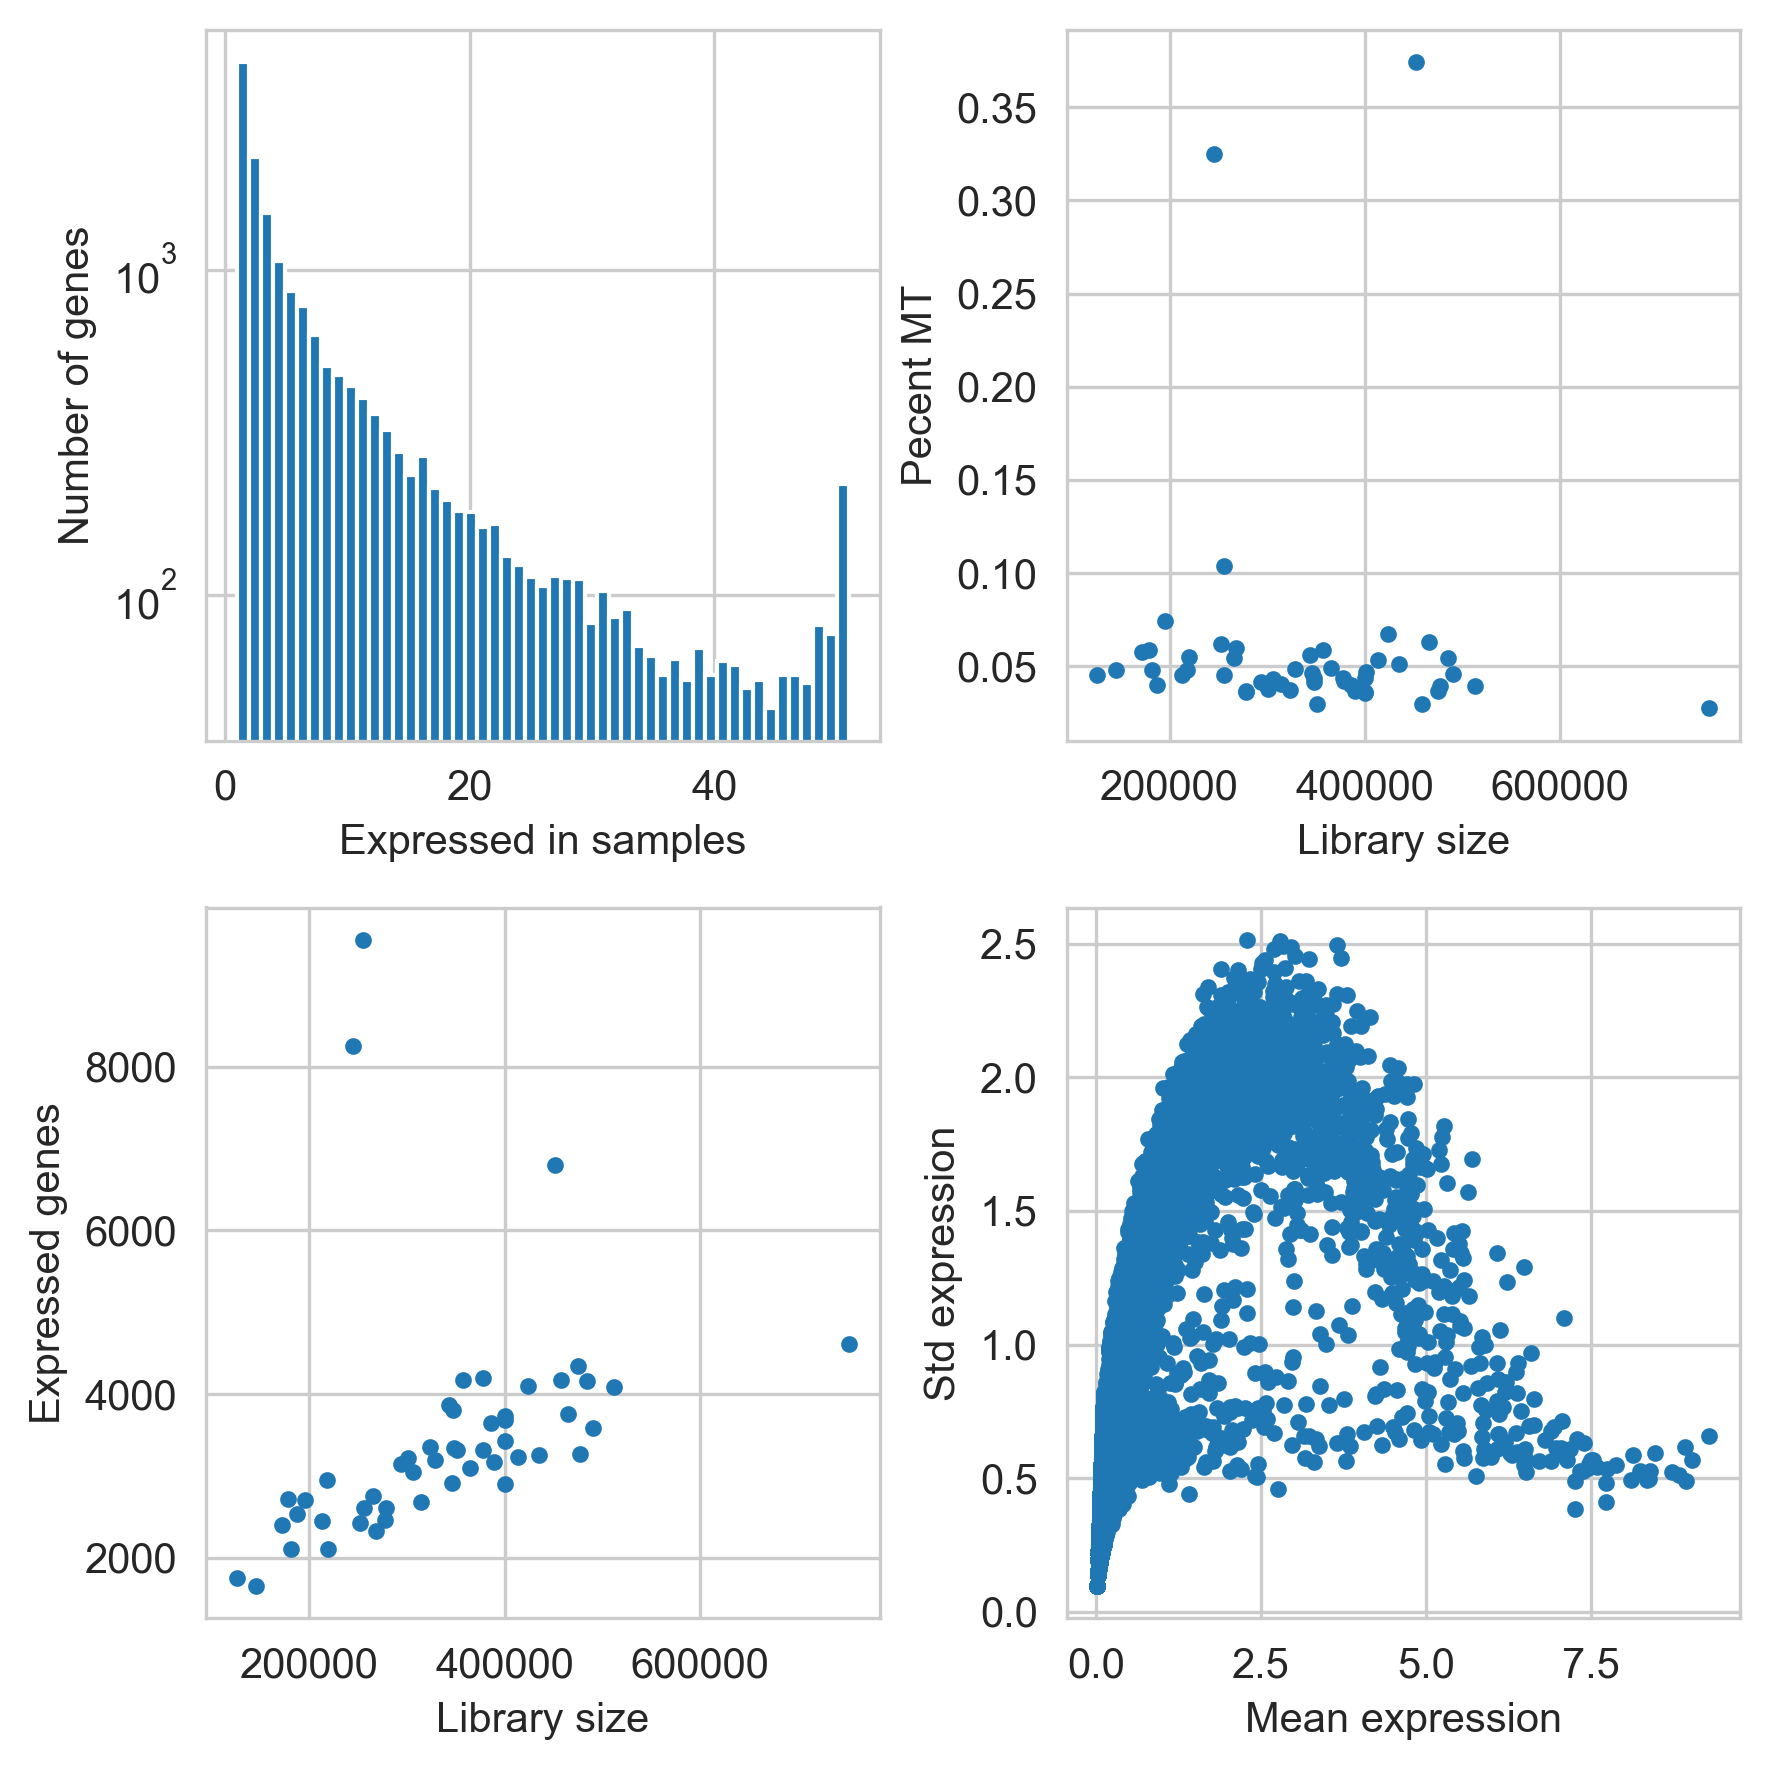

In [87]:
sample_meta, gene_meta = qc.plot_qc(data, sample_meta, gene_meta)

In [88]:
fil = sample_meta['Library_size'] > 100000
sample_meta = sample_meta[fil]
fil = sample_meta['Library_size'] < 600000
sample_meta = sample_meta[fil]
fil = sample_meta['Genes_expressed'] < 6000
sample_meta = sample_meta[fil]

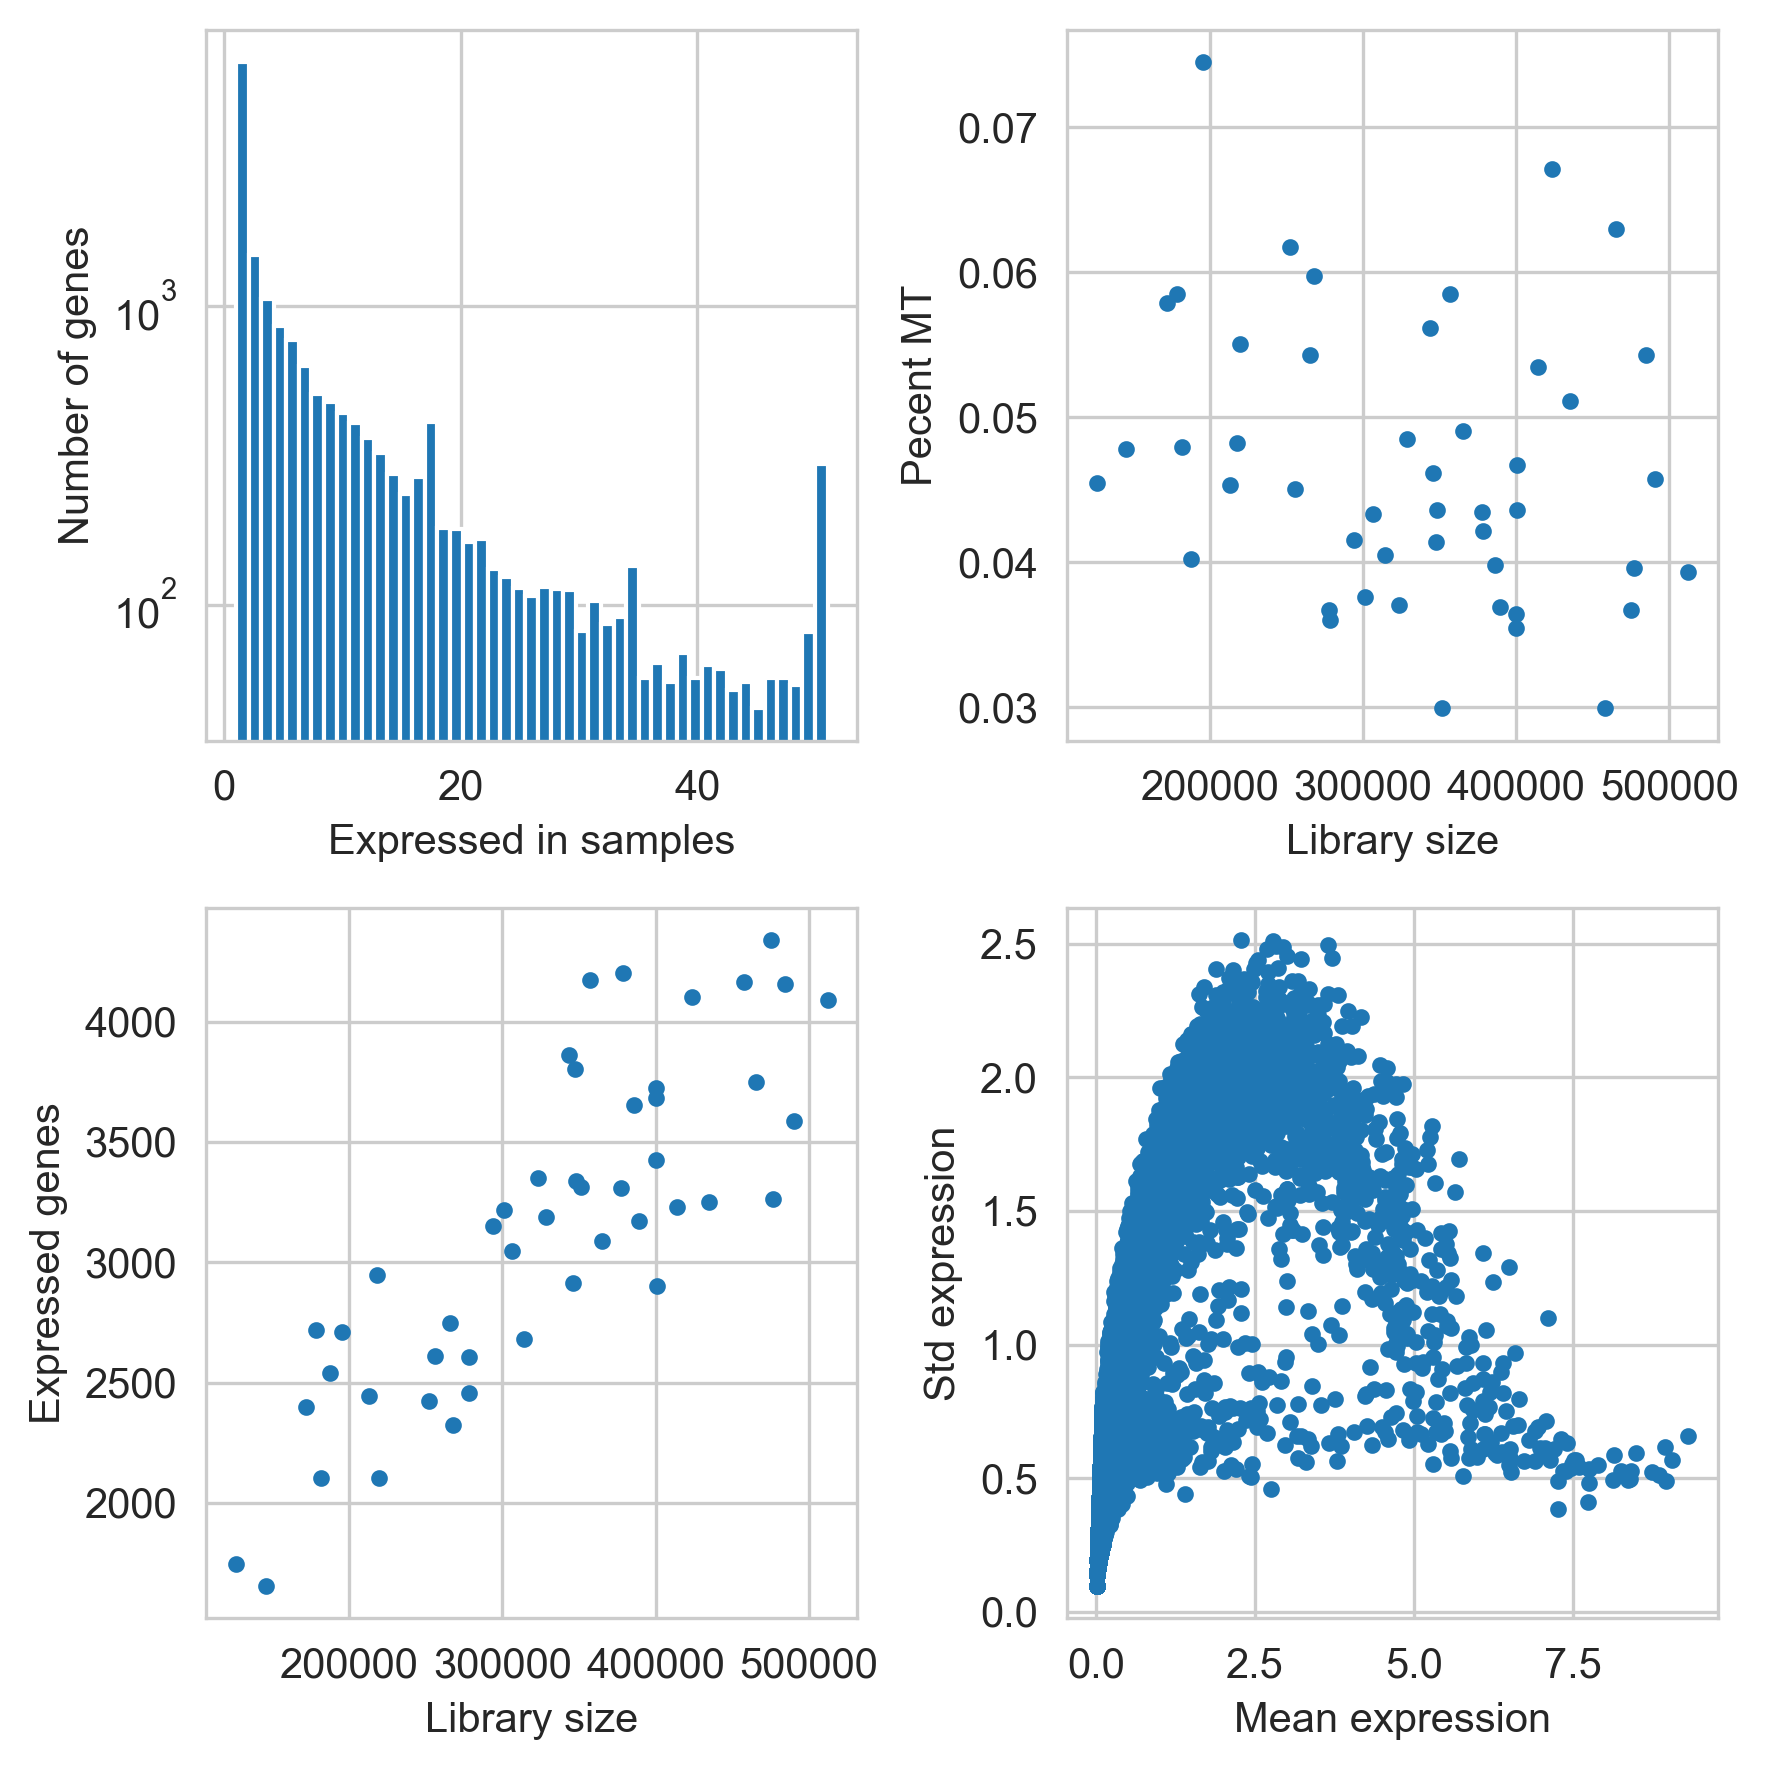

In [89]:
sample_meta, gene_meta = qc.plot_qc(data, sample_meta, gene_meta)

Here we filter based on the number of expressed genes.

In [90]:
for n_expressed in [3, 10, 30]:
    fil = gene_meta['Expressed_samples'] > n_expressed
    gene_meta = gene_meta[fil]
    data = data.loc[gene_meta.index, sample_meta.index]
    data.to_csv('../results/small_scale/filtered_dt_HGNC_counts_%i.csv' % n_expressed)
    sample_meta.to_csv('../results/small_scale/filtered_dt_HGNC_meta_%i.csv' % n_expressed)

BIO experiments

In [91]:
data = pd.read_csv('../data/small_scale/small_scale_matrix_bio_HGNC.csv', 
                                 sep=',', header=0, index_col=0)
sample_meta = pd.read_csv('../data/small_scale/small_scale_meta_bio.csv',
                        sep=',', header=0, index_col=0)
gene_meta = pd.DataFrame(index=data.index)

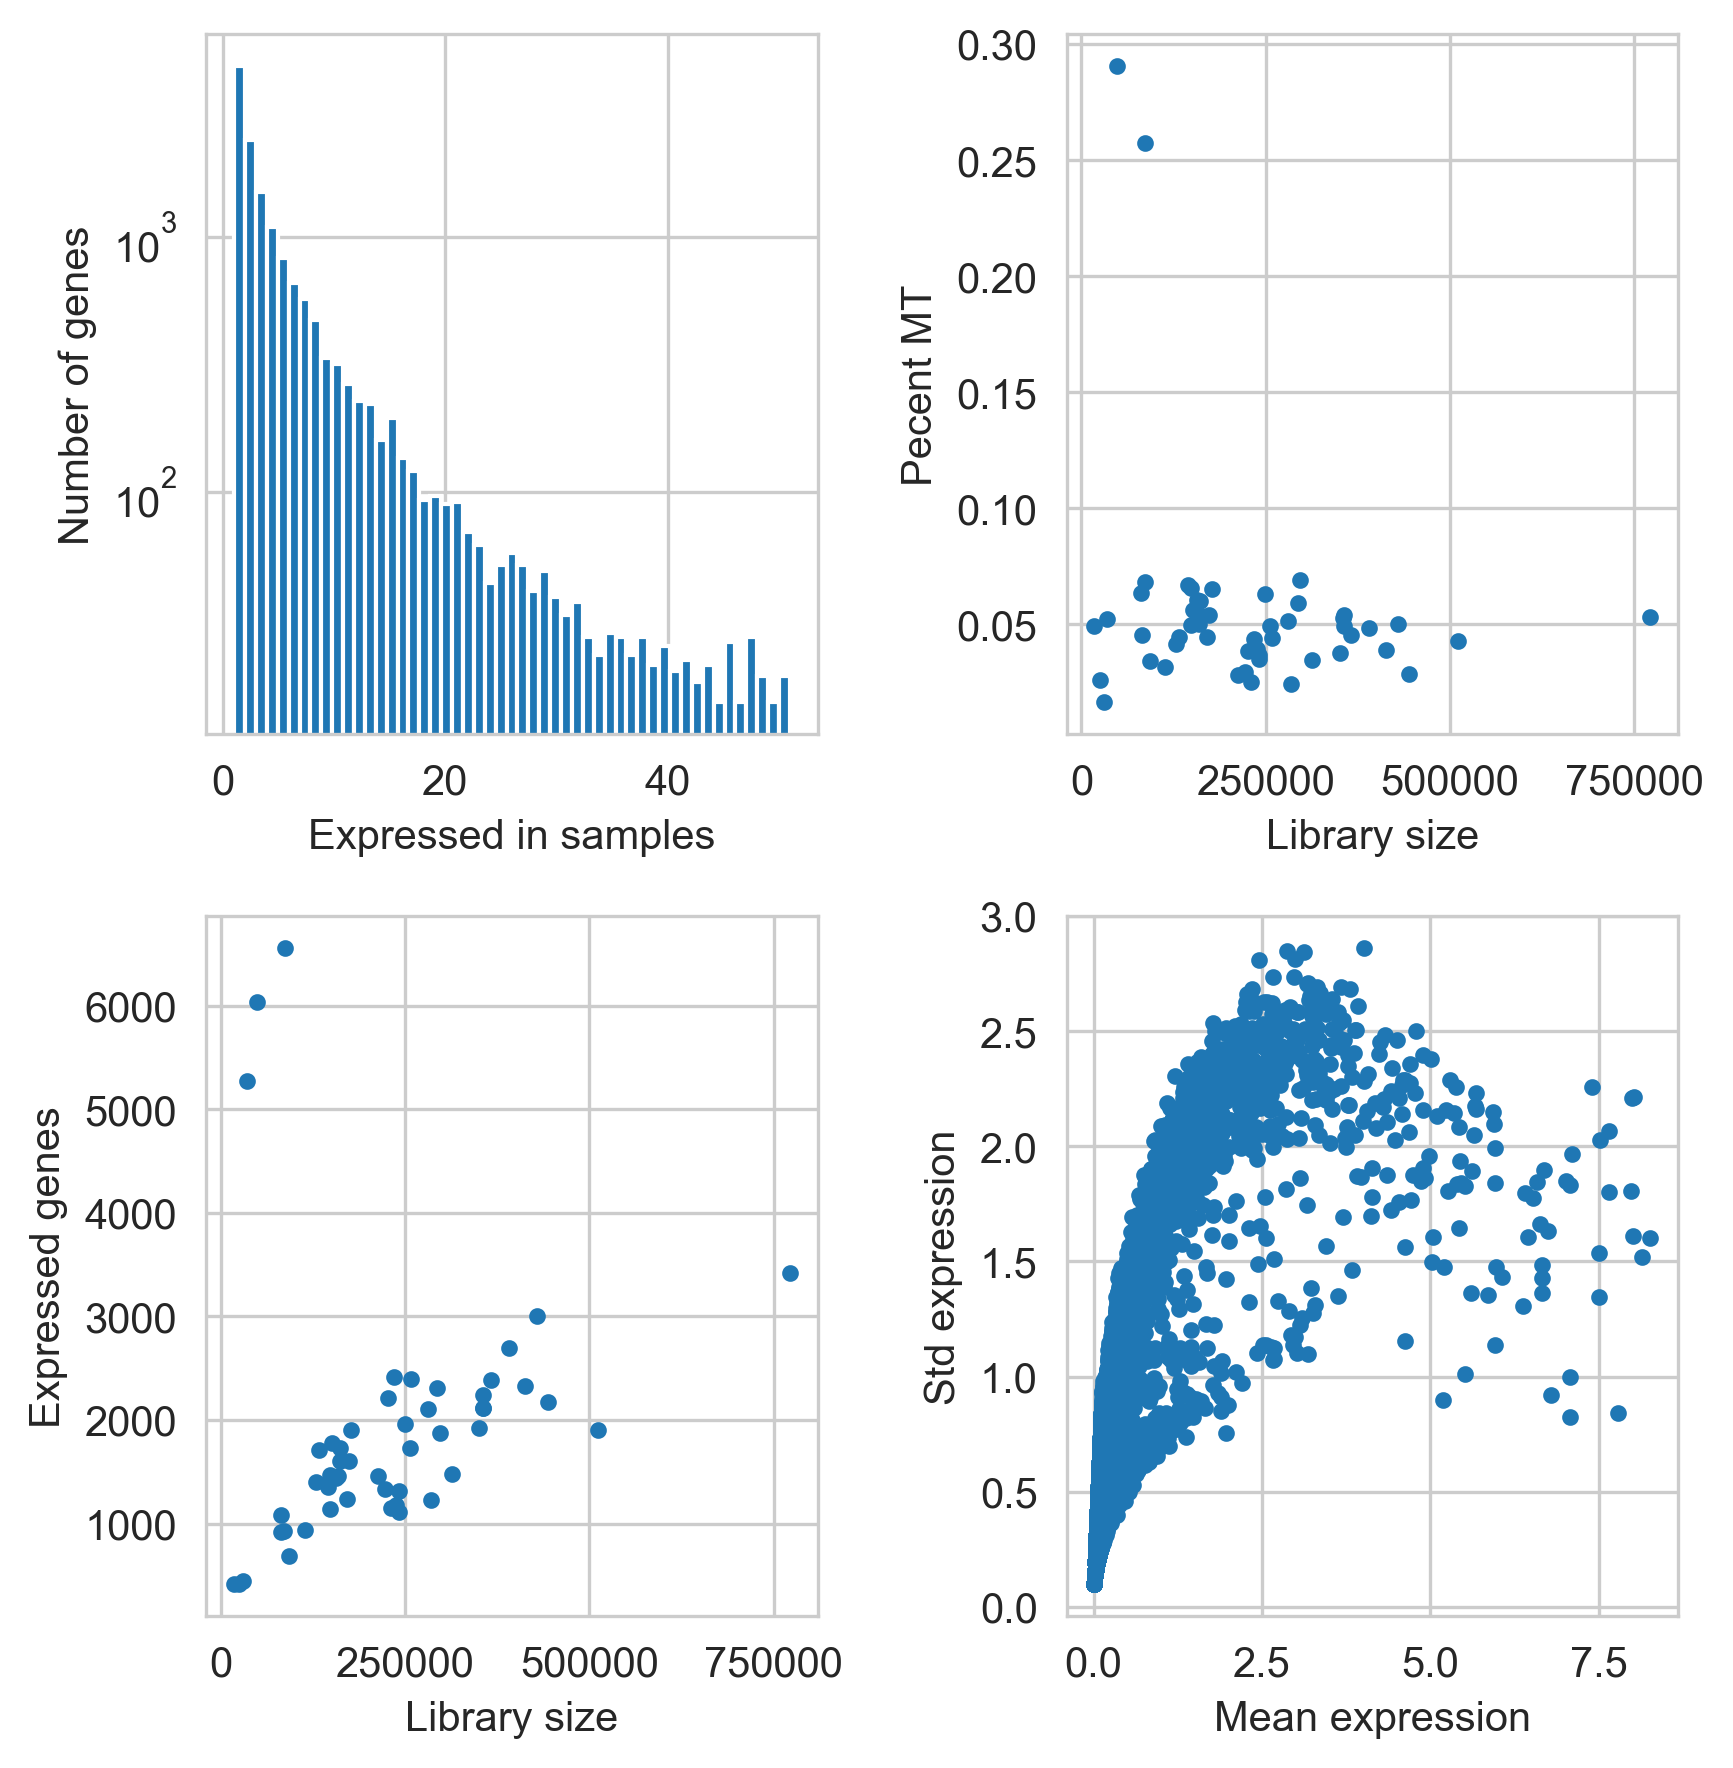

In [92]:
sample_meta, gene_meta = qc.plot_qc(data, sample_meta, gene_meta)

In [93]:
fil = sample_meta['Library_size'] > 50000
sample_meta = sample_meta[fil]
fil = sample_meta['Library_size'] < 600000
sample_meta = sample_meta[fil]
fil = sample_meta['Genes_expressed'] < 5000
sample_meta = sample_meta[fil]

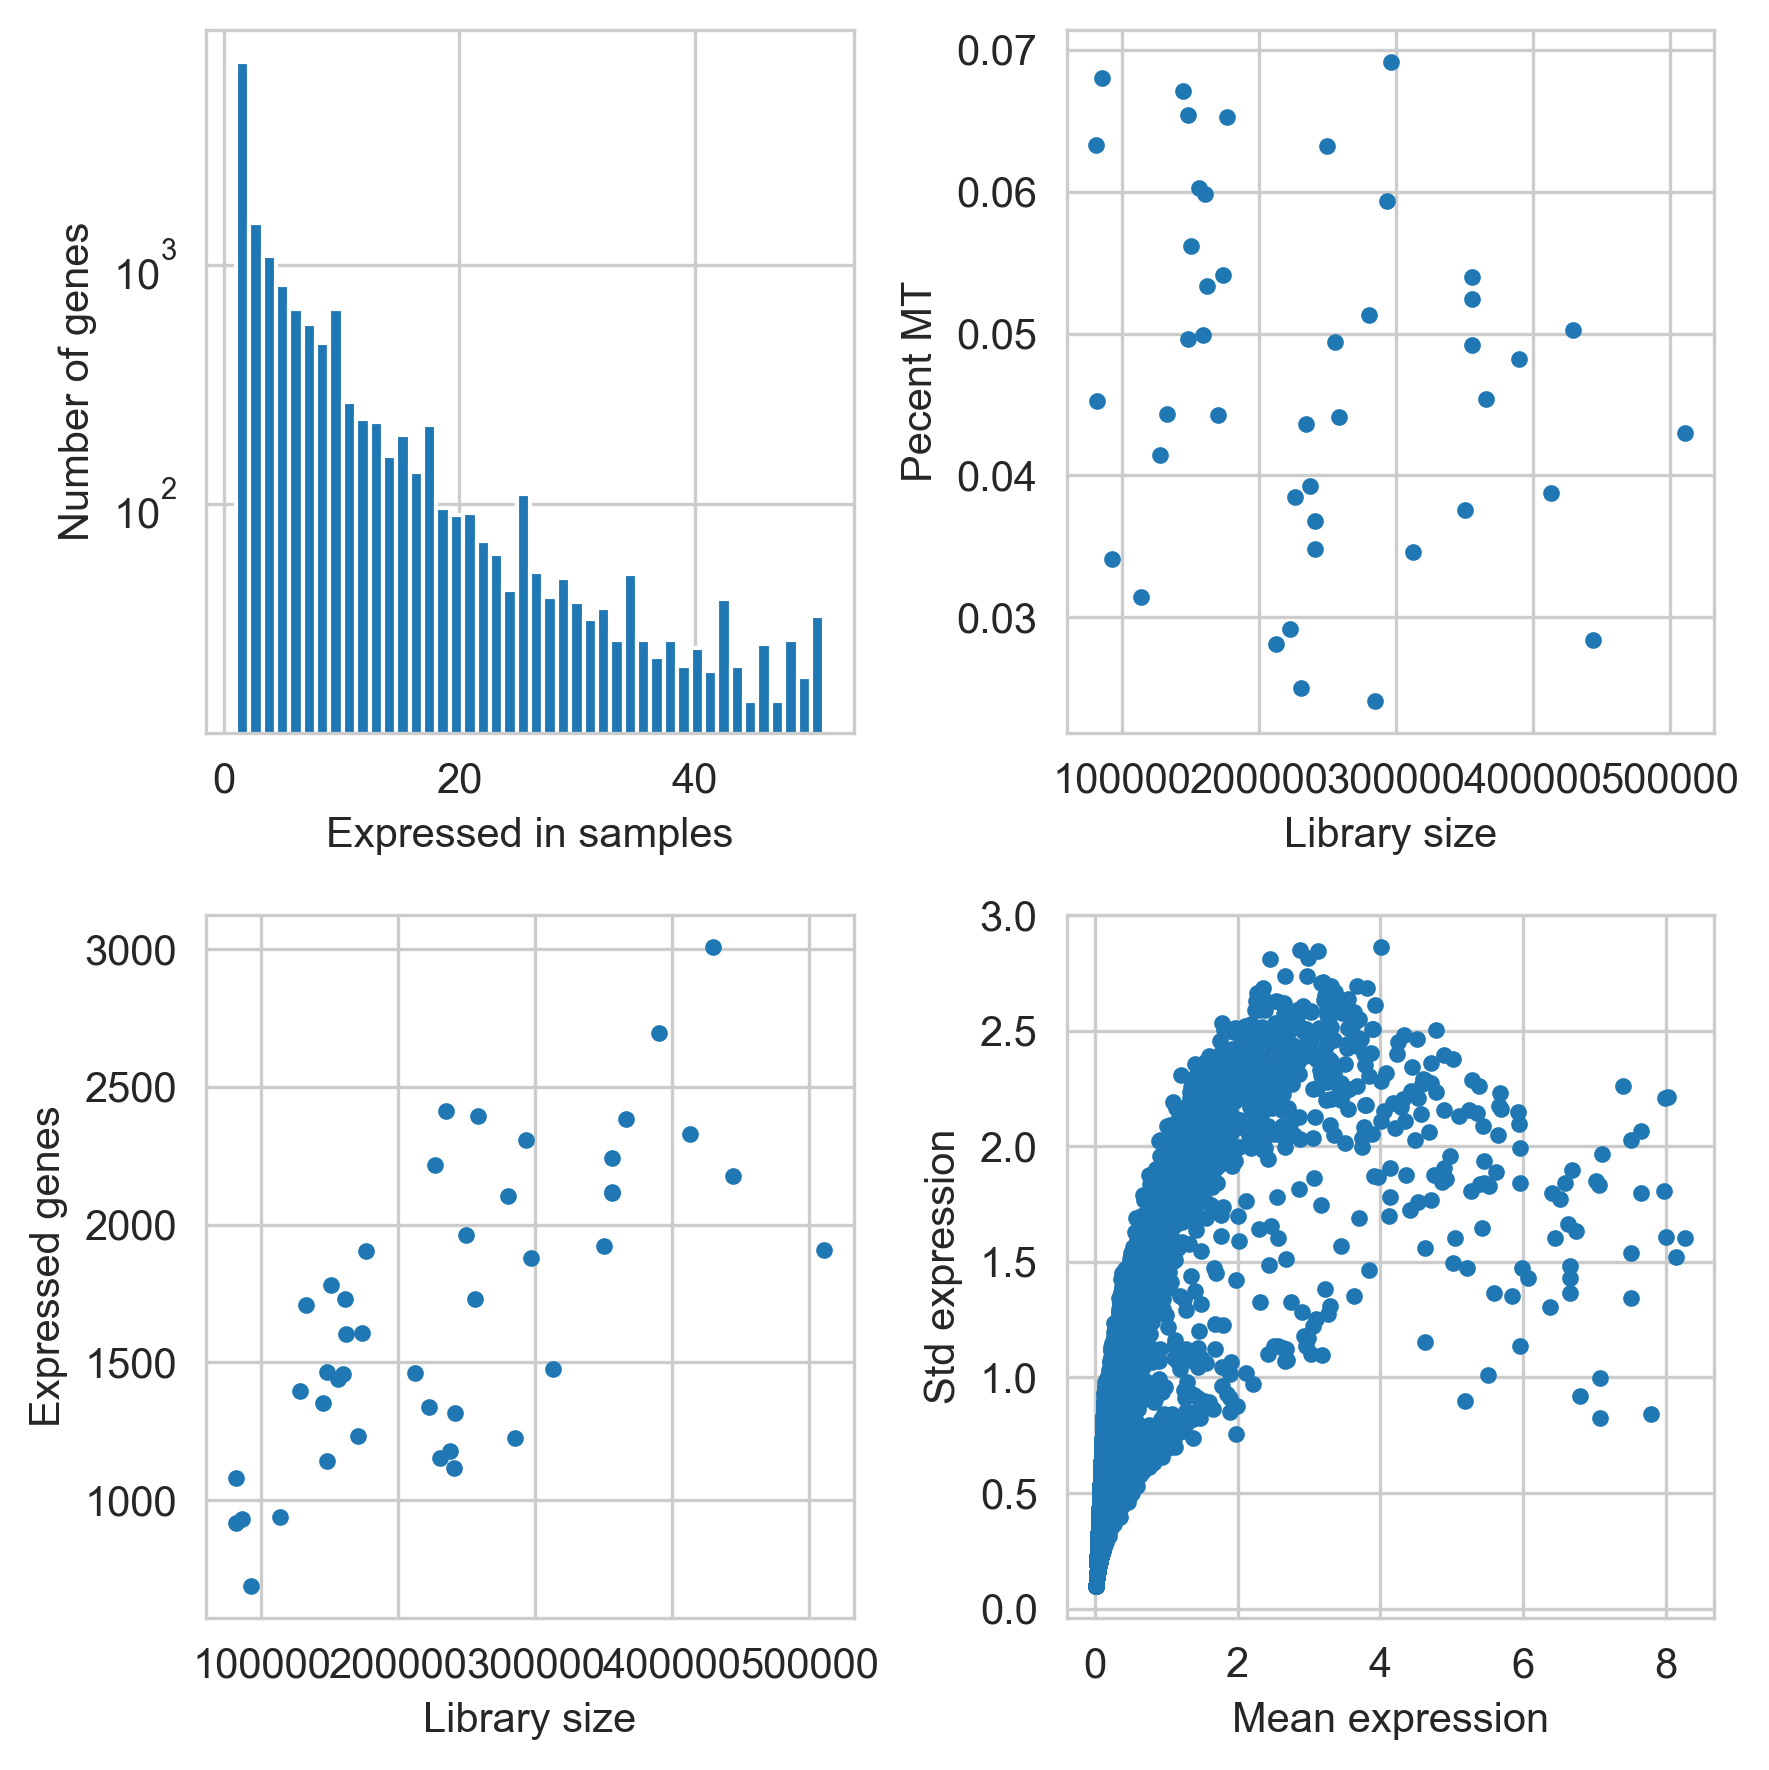

In [94]:
sample_meta, gene_meta = qc.plot_qc(data, sample_meta, gene_meta)

In [95]:
for n_expressed in [3, 10, 30]:
    fil = gene_meta['Expressed_samples'] > n_expressed
    gene_meta = gene_meta[fil]
    data = data.loc[gene_meta.index, sample_meta.index]
    data.to_csv('../results/small_scale/filtered_bio_HGNC_counts_%i.csv' % n_expressed)
    sample_meta.to_csv('../results/small_scale/filtered_bio_HGNC_meta_%i.csv' % n_expressed)

### Larga scale data
We perform the same preprocessing steps with the large scale data.

In [96]:
count_matrix_large = preprocess.create_count_matrix('../data/raw/190526_alignments/')
count_matrix_large = preprocess.remove_0_genes(count_matrix_large)

In [97]:
count_matrix_large.to_csv('../data/large_scale/large_scale_matrix.csv', sep=',')
count_matrix_large.head()

,rep3_Sunitinib_FluoruracilReadsPerGene,rep2_SB747651_BlebbistatinReadsPerGene,rep3_Doxorubicin_DacarbazineReadsPerGene,rep3_Wortmannin_StreptozotocinReadsPerGene,rep3_Razoxane_DacarbazineReadsPerGene,rep3_Dovitinib_StreptozotocinReadsPerGene,rep3_Doxorubicin_EPIRUBICINReadsPerGene,rep1_PF562271_NMS1286937ReadsPerGene,rep3_Baricitinib_FluoruracilReadsPerGene,rep1_Imatininb_YM155ReadsPerGene,...,rep2_Gemcitabine_MethotrexateReadsPerGene,rep1_DMSO_StreptozotocinReadsPerGene,rep3_SB747651_NMS1286937ReadsPerGene,rep2_Imatininb_SF1126ReadsPerGene,rep3_Razoxane_MitomycinReadsPerGene,rep2_Gemcitabine_BlebbistatinReadsPerGene,rep1_Imatininb_EPIRUBICINReadsPerGene,rep2_Baricitinib_MethotrexateReadsPerGene,rep1_Clofarabine_TabloidReadsPerGene,rep1_Imatininb_DMSOReadsPerGene
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000238009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000233750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000268903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000269981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000239906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
count_matrix_large_HGNC = preprocess.translate_gene_ids(count_matrix_large.copy())
count_matrix_large_HGNC.to_csv('../data/large_scale/large_scale_matrix_HGNC.csv')
count_matrix_large_HGNC.head()

,rep3_Sunitinib_FluoruracilReadsPerGene,rep2_SB747651_BlebbistatinReadsPerGene,rep3_Doxorubicin_DacarbazineReadsPerGene,rep3_Wortmannin_StreptozotocinReadsPerGene,rep3_Razoxane_DacarbazineReadsPerGene,rep3_Dovitinib_StreptozotocinReadsPerGene,rep3_Doxorubicin_EPIRUBICINReadsPerGene,rep1_PF562271_NMS1286937ReadsPerGene,rep3_Baricitinib_FluoruracilReadsPerGene,rep1_Imatininb_YM155ReadsPerGene,...,rep2_Gemcitabine_MethotrexateReadsPerGene,rep1_DMSO_StreptozotocinReadsPerGene,rep3_SB747651_NMS1286937ReadsPerGene,rep2_Imatininb_SF1126ReadsPerGene,rep3_Razoxane_MitomycinReadsPerGene,rep2_Gemcitabine_BlebbistatinReadsPerGene,rep1_Imatininb_EPIRUBICINReadsPerGene,rep2_Baricitinib_MethotrexateReadsPerGene,rep1_Clofarabine_TabloidReadsPerGene,rep1_Imatininb_DMSOReadsPerGene
hgnc_symbol,,,,,,,,,,,,,,,,,,,,,
MIR4307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KMT2D,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,12
SLC25A3P2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PDE5A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ADCY6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
meta_large = pd.DataFrame(index=count_matrix_large.columns, columns=['Run', 'Drug1', 'Drug2'])
for sample in meta_large.index:
    if 'DMSO_DMSO_ctrl' in sample:
        r, d1, d2, d = sample.split('_')
        meta_large.loc[sample] = r, d1, d2
    else:
        r, d1, d2 = sample.split('_')
        d2 = d2[:-12]
        meta_large.loc[sample] = r, d1, d2
meta_large['Combo'] = meta_large['Drug1'] + '_' + meta_large['Drug2']
meta_large['Ordered'] = ''
for sample in meta_large.index:
    d1, d2 = meta_large.loc[sample, ['Drug1', 'Drug2']]
    if d1 < d2:
        meta_large.loc[sample, 'Ordered'] = d1 + '_' + d2
    else:
        meta_large.loc[sample, 'Ordered'] = d2 + '_' + d1

In [100]:
meta_large.to_csv('../data/large_scale/large_scale_meta.csv')

#### QC & Filtering

In [101]:
data = pd.read_csv('../data/large_scale/large_scale_matrix_HGNC.csv', 
                                 sep=',', header=0, index_col=0)
sample_meta = pd.read_csv('../data/large_scale/large_scale_meta.csv',
                        sep=',', header=0, index_col=0)
gene_meta = pd.DataFrame(index=data.index)

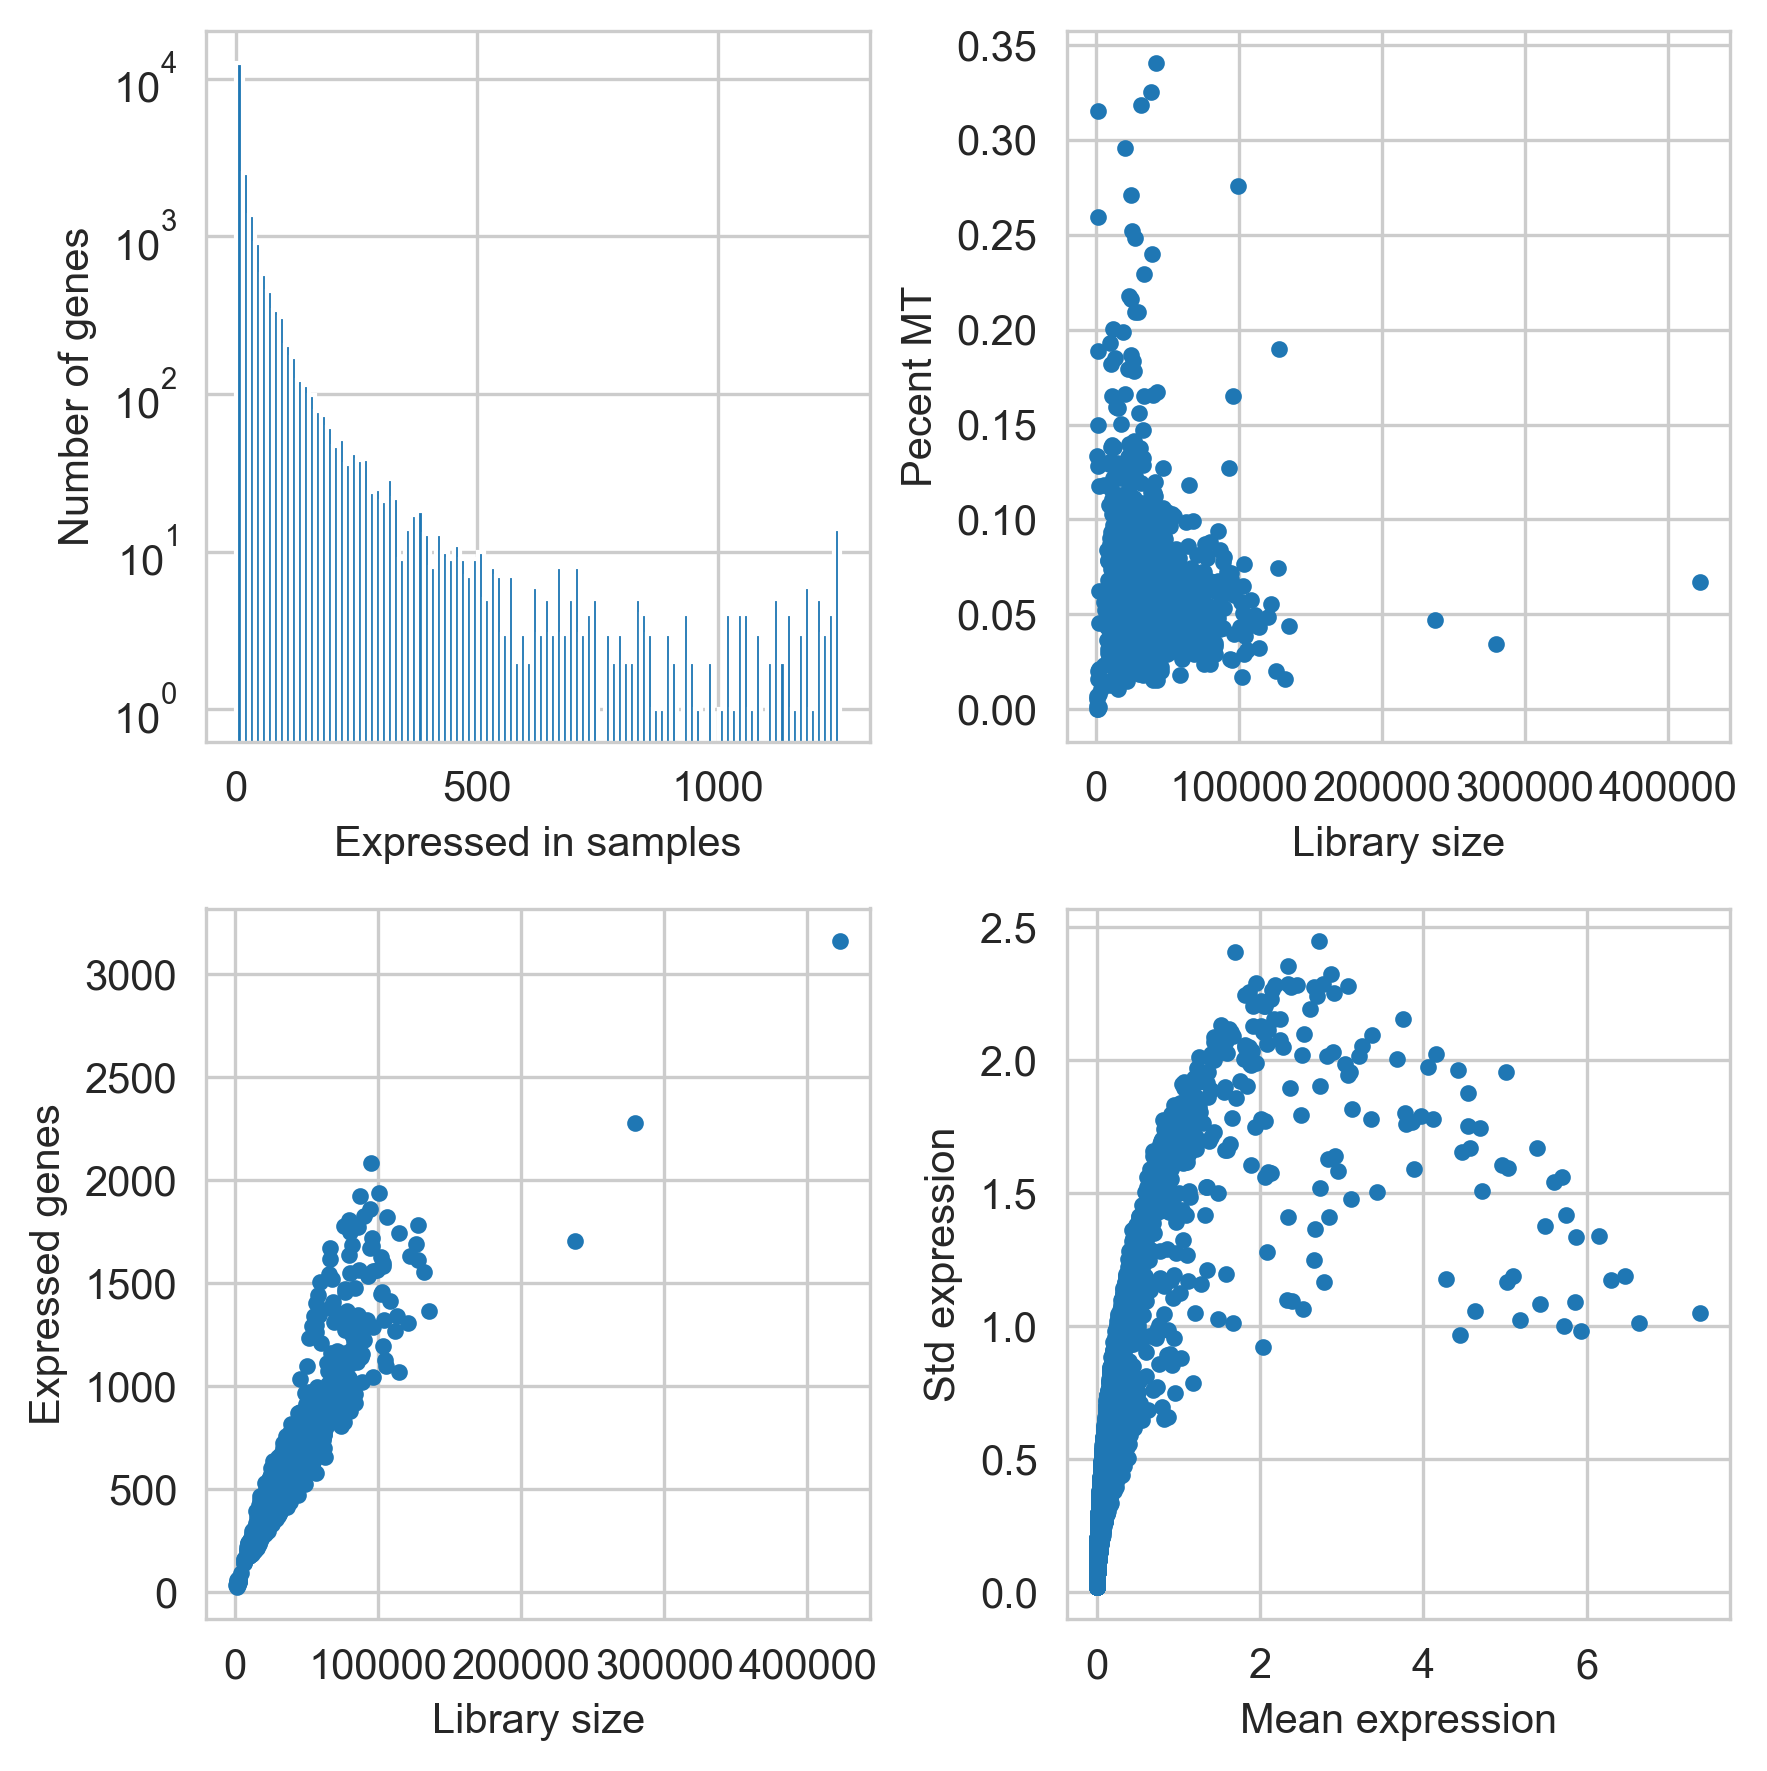

In [102]:
sample_meta, gene_meta = qc.plot_qc(data, sample_meta, gene_meta)

In [103]:
fil = (sample_meta['Library_size'] < 200000) & (sample_meta['Percent MT'] <= 0.15)
sample_meta = sample_meta[fil]
fil = sample_meta['Genes_expressed'] > 200
sample_meta = sample_meta[fil]
data = data[sample_meta.index]

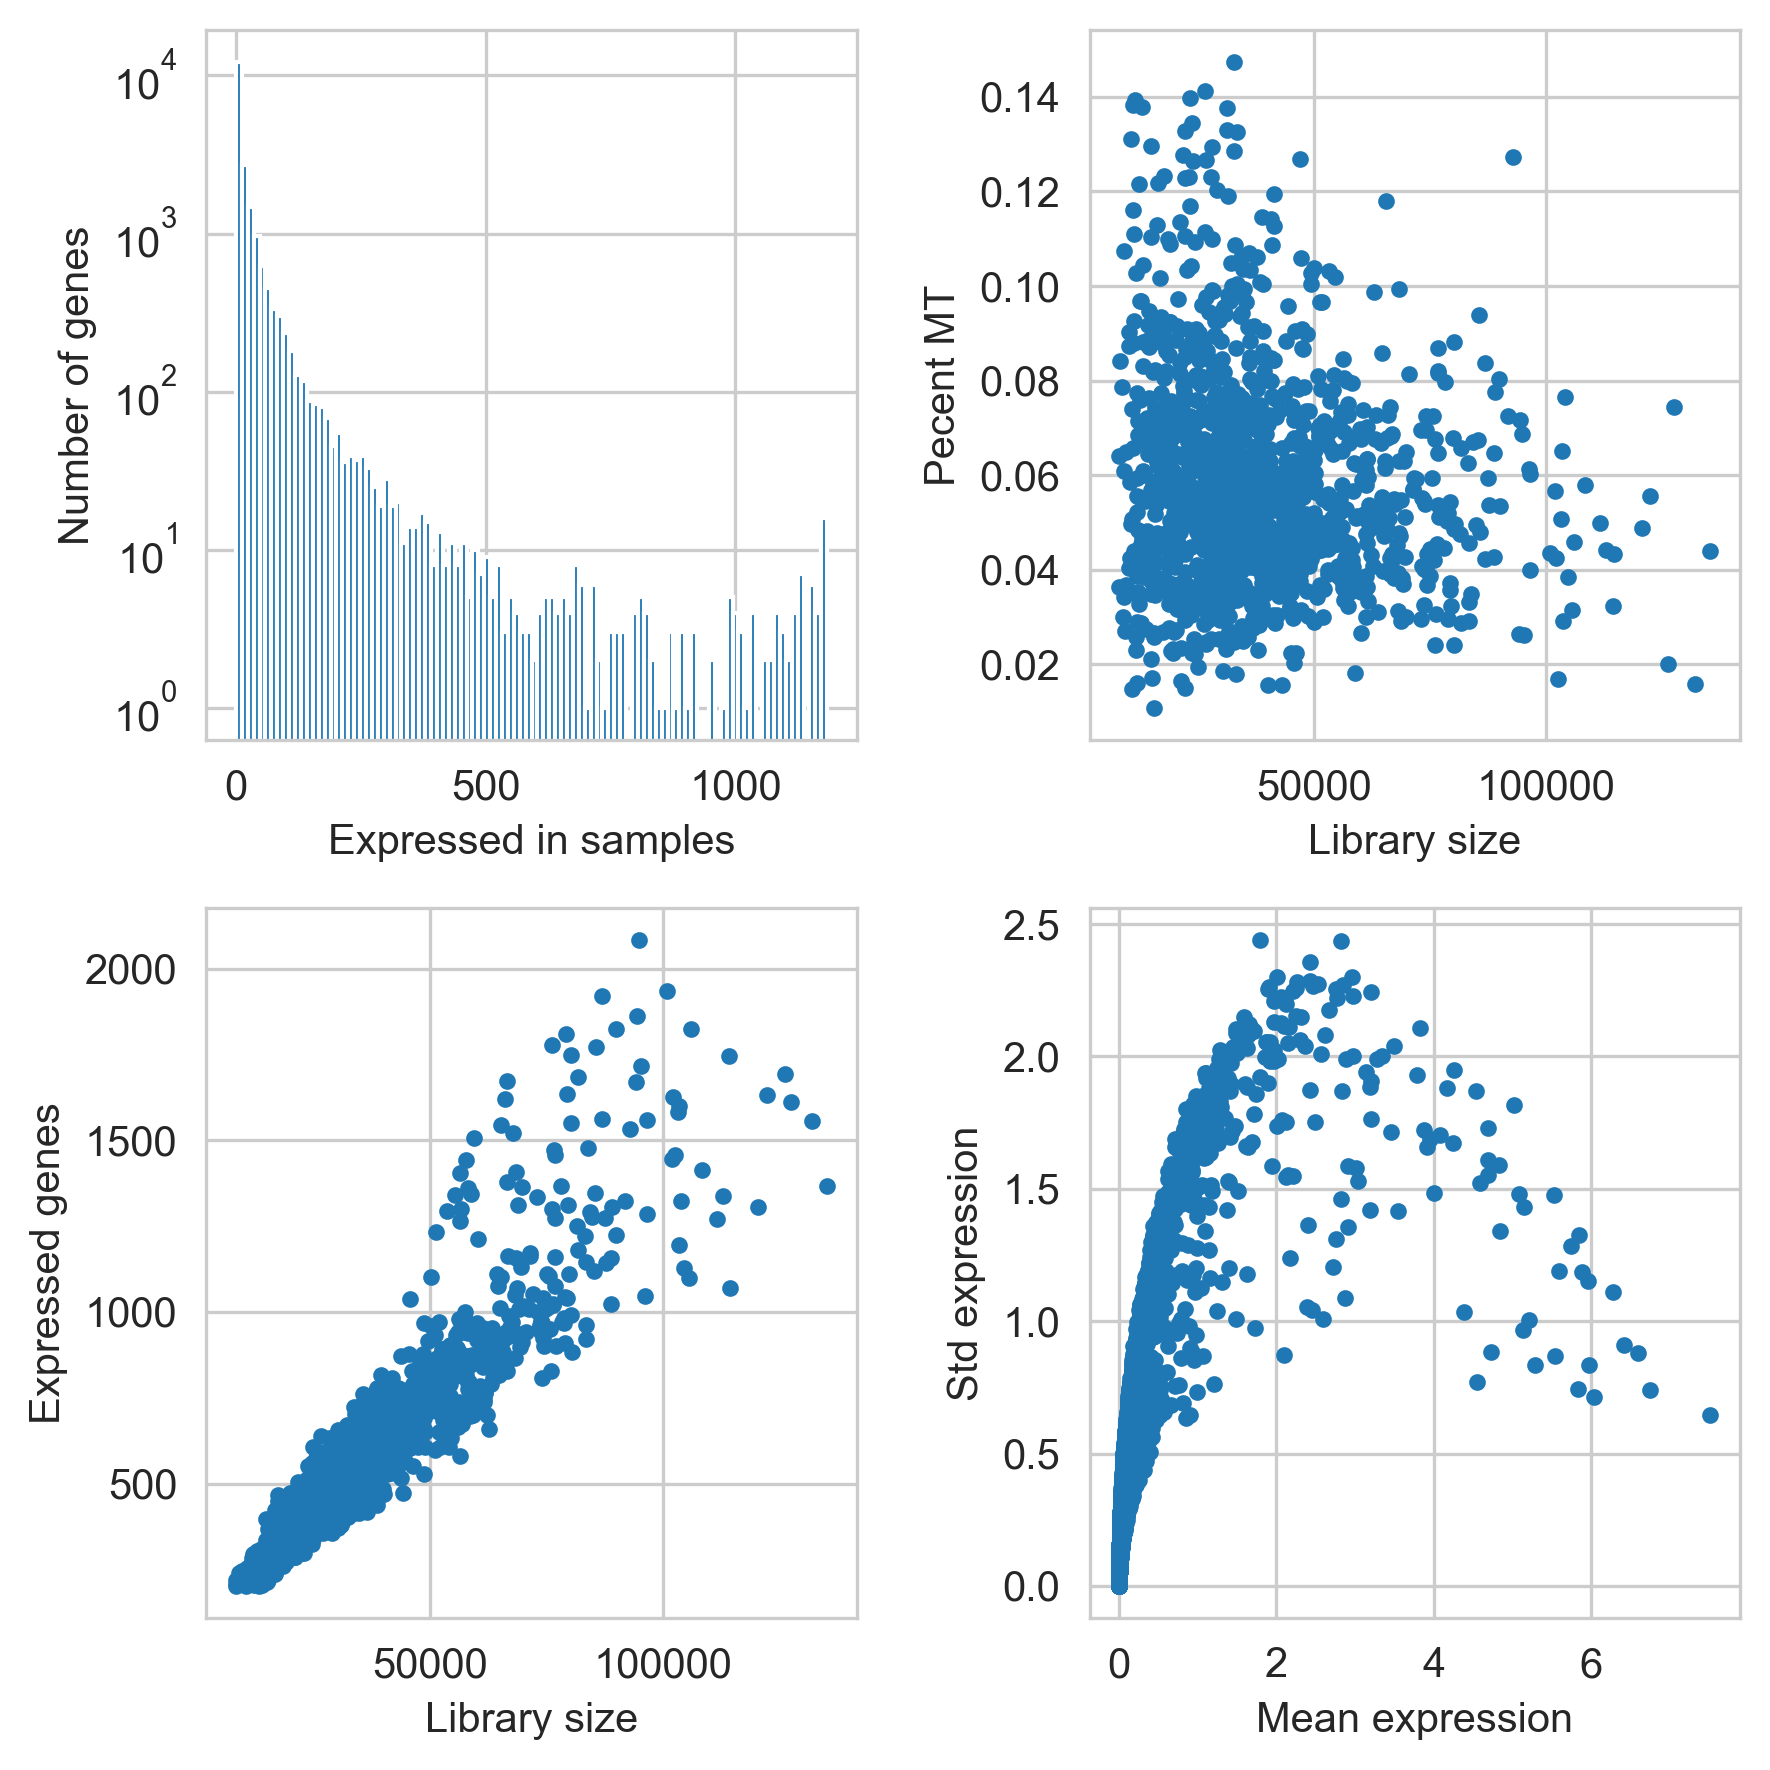

In [104]:
sample_meta, gene_meta = qc.plot_qc(data, sample_meta, gene_meta)

In [105]:
for n_expressed in [100, 300, 500]:
    fil = gene_meta['Expressed_samples'] > n_expressed
    gene_meta = gene_meta[fil]
    data = data.loc[gene_meta.index, sample_meta.index]
    data.to_csv('../results/large_scale/filtered_HGNC_counts_%i.csv' % n_expressed)
    sample_meta.to_csv('../results/large_scale/filtered_HGNC_meta_%i.csv' % n_expressed)